In [1]:
# Class: C964 Computer Science Capstone
# Course Instructor: Dr. Jim Ashe
# Author/Student: Margaret Chrysler
# Completion Date: 11/09/2021

# Import needed tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Magic stuff
%matplotlib inline

In [2]:
# Read in data to datafrom
df = pd.read_csv("Dataset_spine.csv")

In [3]:
#Modeling

# Split data into X and y
X = df.drop("Class_att", axis=1)
y = df['Class_att']

# Random seed
np.random.seed()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
# Define models to work with
models = {"Logistic Regression" : LogisticRegression(solver='lbfgs', max_iter=400),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier(),
         "SVM" : SVC(gamma='auto')}

# Define function to fit and score each model
def fit_score_models(models, X_train, X_test, y_train, y_test):
    """
    This function will train the models and determine each one's accuracy
    
    Inputs: models - the dictonary parameter the defines which models will be used
            X_train - the training dataset (no label, Class_att)
            X_test - the testing dataset (no label, Class_att)
            y_train - the label (Class_att) for the training dataset
            y_test - the label (Class_att) for the testing dataset
            
    Outputs: model_accuracy - a dictonary containing the name and corresponding accuracy
                score for each model.
    """
    # Set random seed
    np.random.seed()
    
    # Create dictionary to record the model scores
    model_accuracy = {}
    
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_accuracy[name] = model.score(X_test, y_test)
        
    return model_accuracy


In [5]:
# Call the fit_score_models function and display the results
models_accuracy = fit_score_models(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
models_accuracy;

# Enter the patient's measurements using the sliders:

Note: Measurements can be fine-tuned with the arrow keys

In [7]:
# Define prediction model
knn = models["KNN"]

# Define FloatSlider for each column
column1 = widgets.FloatSlider(min=20.0, max=135.0, step=0.05, value=57.5)
column2 = widgets.FloatSlider(min=-8.0, max=55.0, step=0.05, value=33.5)
column3 = widgets.FloatSlider(min=14.0, max=135.0, step=0.05, value=60.0)
column4 = widgets.FloatSlider(min=10.0, max=130.0, step=0.05, value=70.0)
column5 = widgets.FloatSlider(min=65.0, max=170.0, step=0.05, value=47.5)
column6 = widgets.FloatSlider(min=-15.0, max=430.0, step=0.05, value=207.5)
column7 = widgets.FloatSlider(min=0.0, max=1.5, step=0.005, value=0.0)
column8 = widgets.FloatSlider(min=6.0, max=40.0, step=0.05, value=24.0)
column9 = widgets.FloatSlider(min=5.0, max=25.0, step=0.05, value=15.0)
column10 = widgets.FloatSlider(min=5.0, max=20.0, step=0.05, value=12.5)
column11 = widgets.FloatSlider(min=-40.0, max=10.0, step=0.05, value=-15.0)
column12 = widgets.FloatSlider(min=5.0, max=50.0, step=0.05, value=27.5)

# Define Labels for each column so they can all be read
label1 = widgets.Label('Pelvic Incidence')
label2 = widgets.Label('Pelvic Tilt')
label3 = widgets.Label('Lumbar Lordosis Angle')
label4 = widgets.Label('Sacral Slope')
label5 = widgets.Label('Pelvic Radius')
label6 = widgets.Label('Degree Spondylolisthesis')
label7 = widgets.Label('Pelvic Slope')
label8 = widgets.Label('Direct Tilt')
label9 = widgets.Label('Thoracic Slope')
label10 = widgets.Label('Cervical Tilt')
label11 = widgets.Label('Sacrum Angle')
label12 = widgets.Label('Scoliosis Slope')
                 
# Define HBox(es) for the sliders layout
row1 = widgets.HBox([label1, column1])
row2 = widgets.HBox([label2, column2])
row3 = widgets.HBox([label3, column3])
row4 = widgets.HBox([label4, column4])
row5 = widgets.HBox([label5, column5])
row6 = widgets.HBox([label6, column6])
row7 = widgets.HBox([label7, column7])
row8 = widgets.HBox([label8, column8])
row9 = widgets.HBox([label9, column9])      
row10 = widgets.HBox([label10, column10])          
row11 = widgets.HBox([label11, column11])
row12 = widgets.HBox([label12, column12])


# Define button event handler
def submit_patient_data(btn_object):
    """
    This function collects the patient_values from the slider widgets, uses the array as input
    to run a prediction of whether the patient's spine is Normal or Abnormal, and 
    displays the results in the measurements_label_2 and results_label_2
    
    Input: btn_object - the button that is clicked to run this defined OnClick style button.
    
    Output: Nothing is returned by this function. 
            However, measurements_label_2 and results_label_2 are updated.
    """
    # Define columns array
    columns_array = [column1, column2, column3, column4, column5, column6, column7, column8, column9,
                column10, column11, column12]
    
    # Reset the output labels
    measurement_string = ''
    result_string = ''
    
    # Gather the array of patient values for prediction input
    patient_values = []
    for i in range(12):
        patient_values.append(columns_array[i].value)
    
    # Apparently KNN's predict function needs a 2D array so accommodate that [[abnormal], [normal]]
    prediction_array = [[49.71285934, 9.652074879, 28.317406, 40.06078446, 108.1687249, 7.918500615, 0.543360472, 
                         35.494, 15.9546, 8.87237, -16.378376, 24.9171],
                        [61.44659663, 22.6949683, 46.17034732, 38.75162833, 125.6707246, -2.707879517, 0.081070436, 
                         16.2059, 13.5565, 8.89572, 3.564463, 18.4151]
                       ]
    # Append patient's measurements for the prediction
    prediction_array.append(patient_values)
    
    # Run the prediction
    patient_abnormality_prediction = knn.predict(prediction_array)
    
    # Prepare output strings: measurements and prediction results
    measurements_string = ''.join(str(patient_values))
    if patient_abnormality_prediction[2] == 'Abnormal':
        result_string = 'Measurements indicate a spinal abnormality.'
    elif patient_abnormality_prediction[2] == 'Normal':
        result_string = 'Measurements DO NOT indicate spinal abnormality.'
    
    # Update the output strings to what is displayed
    measurements_label_2.value = measurements_string
    result_label_2.value = result_string
        
# Define the button to submit patient information for classification prediction
layout = widgets.Layout(width = '45%', height = '75px')
submit_button = widgets.Button(description="Submit Patient Measurements", layout=layout, style=dict(font_size = '20px', 
                                                                                                    font_weight='bold'))

# Define trigger for button click
submit_button.on_click(submit_patient_data)

# Define results array
measurements_string = ''
measurements_label_1 = widgets.Label('Measurements: ')
measurements_label_2 = widgets.Label(measurements_string)
result_string = ''
result_label_1 = widgets.Label('Result:')
result_label_2 = widgets.Label(result_string)

# Define sliders array
sliders_array = [row1, row2, row3, row4, row5, row6, row7, row8, row9, row10, row11, row12, 
                 submit_button, measurements_label_1, measurements_label_2,
                result_label_1, result_label_2]

# User Interface
ui = widgets.VBox(sliders_array)

display(ui)

## 
# Correlation matrix of all of the factors:

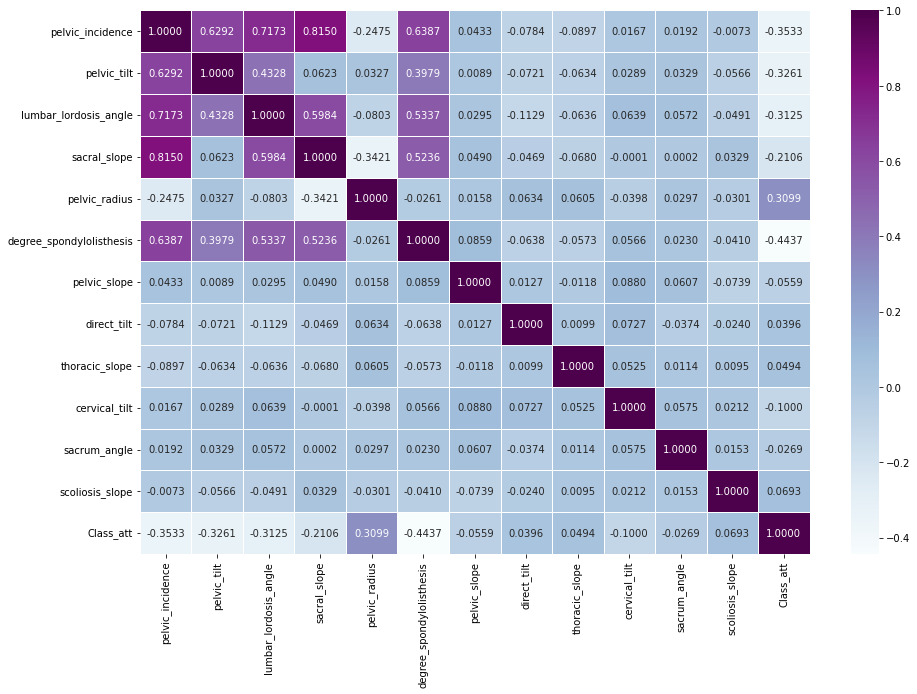

In [8]:
# Note: need to LabelEncode Class_att to binary values for it to show in heatmap
le = LabelEncoder()
copy_df = df.copy()
copy_df['Class_att'] = le.fit_transform(copy_df.Class_att)

# Correlation matrix as a heatmap
corr_matrix = copy_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".4f", cmap="BuPu")

# Histogram:
# Distribution of each of the top four influential factors

In [9]:
# Define draw histogram function
def draw_histogram(factor):
    """
    This function draws the histogram for the column that is passed to it as a parameter.
    
    Input: factor - the column from the dataform to be mapped as a histogram
    
    Output: Nothing is returned by this function.
    """
    # Set up the histogram using the factor parameter
    df.hist(factor)
    
    # Set up and display the histogram, its title, and labels
    plt.title('Factors with High Influence')
    plt.xlabel(factor)
    plt.ylabel('Amount')
    plt.show()
    
# Call the histogram as an interactive widget
h = widgets.interact(draw_histogram, factor=['degree_spondylolisthesis', 'pelvic_incidence', 
                                             'pelvic_tilt', 'lumbar_lordosis_angle']);

interactive(children=(Dropdown(description='factor', options=('degree_spondylolisthesis', 'pelvic_incidence', …

# Pelvic Incidence to Pelvic Tilt Relationship

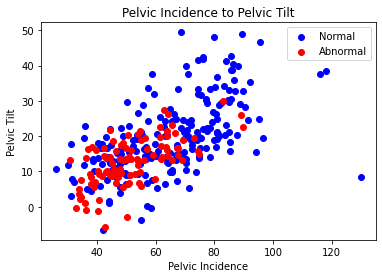

In [10]:
# Define the two scatterplots (Normal and Abnormal groups)
plt.scatter(df.pelvic_incidence[df.Class_att == 'Abnormal'],
            df.pelvic_tilt[df.Class_att == 'Abnormal'], c = "blue")
plt.scatter(df.pelvic_incidence[df.Class_att == 'Normal'],
            df.pelvic_tilt[df.Class_att == 'Normal'], c = "red")

# Set up and display the scatterplot, its title, and labels
plt.title("Pelvic Incidence to Pelvic Tilt")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Pelvic Tilt")
plt.legend(["Normal", "Abnormal"])
plt.show()

## Comparing Degree of Spondylolisthesis to Other Factors

In [11]:
def compare_factors(outcome):
    """
    This function draws a scatterplot for the Class_att value that is passed to it as a parameter.
    
    Input: outcome - either 'Normal' or 'Abnormal', filters the group of points to be included in the scatterplot
    
    Output: Nothing is returned by this function.
    """
    
    # Define the three overlapping scatterplots 
    plt.scatter(df.degree_spondylolisthesis[df.Class_att == outcome],
                df.pelvic_incidence[df.Class_att == outcome], c = "purple")
    plt.scatter(df.degree_spondylolisthesis[df.Class_att == outcome],
                df.pelvic_tilt[df.Class_att == outcome], c = "green")
    plt.scatter(df.degree_spondylolisthesis[df.Class_att == outcome],
                df.lumbar_lordosis_angle[df.Class_att == outcome], c = "yellow")
    
    # Determine which title to use depending on the function's parameter (output)
    if outcome == 'Abnormal':
        title_string = "Degree of Spondylolisthesis and Other Top Factors in Abnormal Spine"
    else:
        title_string = "Degree of Spondylolisthesis to Other Top Factors in Normal Spine"
    
    # Set up and display the scatterplot, its title, and labels
    plt.title(title_string)
    plt.xlabel("Degree Spondylolisthesis")
    plt.ylabel("Other factors")
    plt.legend(["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle"])
    plt.show()

# Call the scatterplot as an interactive widget
sp = widgets.interact(compare_factors, outcome=['Abnormal', 'Normal']);

interactive(children=(Dropdown(description='outcome', options=('Abnormal', 'Normal'), value='Abnormal'), Outpu…

# ______________________________________________________

Created by Margaret Chrysler on 11/09/2021

for Computer Science final project using machine learning in Jupyter Notebook as a web application

Note: this application has not been reviewed or tested for actual medical diagnostic use